In [1]:
import pandas as pd
import numpy as np
import gplately
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from plate_model_manager import PlateModelManager

In [2]:
pm_manager = PlateModelManager()
muller2019_model = pm_manager.get_model("Muller2019", data_dir="plate-model-repo")

rotation_model = muller2019_model.get_rotation_model()
topology_features = muller2019_model.get_topologies()
static_polygons = muller2019_model.get_static_polygons()

coastlines = muller2019_model.get_layer('Coastlines')
continents = muller2019_model.get_layer('ContinentalPolygons')
COBs =  muller2019_model.get_layer('COBs')

model = gplately.PlateReconstruction(rotation_model, topology_features, static_polygons)
gplot = gplately.PlotTopologies(model, coastlines=coastlines, continents=continents, COBs=COBs)

downloading https://repo.gplates.org/webdav/pmm/muller2019/Rotations.zip
The local file(s) is/are still good. Will not download again at this moment.
downloading https://repo.gplates.org/webdav/pmm/muller2019/Topologies.zip
The local file(s) is/are still good. Will not download again at this moment.
downloading https://repo.gplates.org/webdav/pmm/muller2019/StaticPolygons.zip
The local file(s) is/are still good. Will not download again at this moment.
downloading https://repo.gplates.org/webdav/pmm/muller2019/Coastlines.zip
The local file(s) is/are still good. Will not download again at this moment.
downloading https://repo.gplates.org/webdav/pmm/muller2019/ContinentalPolygons.zip
The local file(s) is/are still good. Will not download again at this moment.
downloading https://repo.gplates.org/webdav/pmm/muller2019/COBs.zip
The local file(s) is/are still good. Will not download again at this moment.


In [4]:
# download data for the Late Cretaceous, and inclue the paleoenvironment column.
# You can use the download page to play with the options and get the download link and/or CSV.
pbdb_data_url = 'https://paleobiodb.org/data1.2/occs/list.csv?datainfo&rowcount&base_name=Foraminifera&interval=Jurassic&show=coords,env'

## import from the URL
pbdb_data = pd.read_csv(pbdb_data_url, sep=',', skiprows=18) 
pbdb_data.columns

Index(['occurrence_no', 'record_type', 'reid_no', 'flags', 'collection_no',
       'identified_name', 'identified_rank', 'identified_no', 'difference',
       'accepted_name', 'accepted_rank', 'accepted_no', 'early_interval',
       'late_interval', 'max_ma', 'min_ma', 'reference_no', 'lng', 'lat',
       'environment'],
      dtype='object')

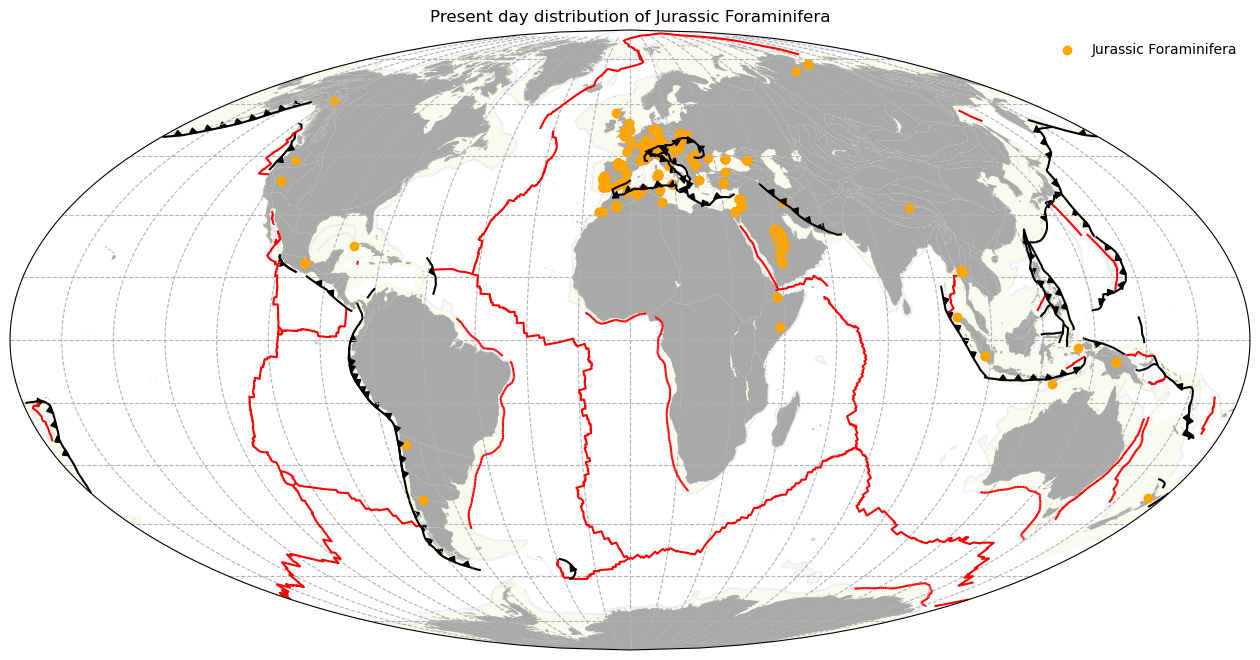

In [5]:
# Set up a GeoAxis plot
fig = plt.figure(figsize=(16,12), dpi=100)
ax = fig.add_subplot(111, projection=ccrs.Mollweide(central_longitude = 0))
ax.set_global()
ax.gridlines(color='0.7',linestyle='--', xlocs=np.arange(-180,180,15), ylocs=np.arange(-90,90,15))
ax.set_title("Present day distribution of Jurassic Foraminifera")

# Plot shapefile features, subduction zones and MOR boundaries at 0 Ma
gplot.time = 0 # Ma
gplot.plot_continent_ocean_boundaries(ax, color='b', alpha=0.05)
gplot.plot_continents(ax, facecolor='palegoldenrod', alpha=0.2)
gplot.plot_coastlines(ax, color='DarkGrey')
gplot.plot_ridges_and_transforms(ax, color='red')
gplot.plot_trenches(ax, color='k')
gplot.plot_subduction_teeth(ax, color='k')

sc = ax.scatter(pbdb_data['lng'], pbdb_data['lat'], color='orange', 
                transform=ccrs.PlateCarree(), label='Jurassic Foraminifera')
ax.legend(frameon=False)